### Stocks from Yahoo finance against irish news

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.style.use('ggplot')

In [3]:
# Bank of America Corporation (BAC)
DATA_SRC_1 = "../dataset/finance.yahoo.com/BAC.07.2017-12.2017.csv"
# Citigroup Inc. (C)
DATA_SRC_2 = "../dataset/finance.yahoo.com/Citigroup.07.2017-12.2017.csv"
NEWS_SRC = 'df_irish_news_score.csv'

In [4]:
df1 = pd.read_csv(DATA_SRC_1, index_col='Date', parse_dates=True, usecols=['Date', 'Close', 'Volume'])
df2 = pd.read_csv(DATA_SRC_2, index_col='Date', parse_dates=True, usecols=['Date', 'Close', 'Volume'])

In [5]:
df1.head(2), df1.tail(2)

(            Close    Volume
 Date                       
 2017-06-30  24.26  84005200
 2017-07-03  24.68  58129700,                 Close    Volume
 Date                           
 2017-12-28  29.799999  37914900
 2017-12-29  29.520000  40672000)

In [7]:
df_news_score = pd.read_csv(NEWS_SRC, parse_dates=True, index_col='publish_date')
df_news_idx = df_news_score.index
df_news_score.head(2)

,news_score,business.energy-and-resources,business.innovation,news.law.courts.circuit-court,news.politics,business.agribusiness-and-food,news.politics.oireachtas,news.world.middle-east,business.construction,news.law.courts.district-court,...,business.manufacturing,news.law,news.law.courts.coroner-s-court,business.commercial-property,news.law.courts.criminal-court,news.world,news.world.europe,news.law.courts,news.world.us,other_cat
publish_date,,,,,,,,,,,,,,,,,,,,,
2017-06-01,-6.0,0.0,0.379,-0.167,0.471,0.206,-0.943,0.0,-0.262,-0.302,...,-0.145,-1.240,0.000,0.119,-0.852,0.000,0.180,0.0,-0.035,0.066
2017-06-02,-1.0,0.0,0.000,0.216,1.048,0.000,0.219,0.0,0.000,0.000,...,0.000,-0.584,-0.095,0.000,-0.615,0.252,-0.321,0.0,0.456,-0.449


In [8]:
min_idx = max(df1.index[0], df_news_idx[0])
max_idx = min(df1.index[-1], df_news_idx[-1])
min_idx, max_idx

(Timestamp('2017-06-30 00:00:00'), Timestamp('2017-12-29 00:00:00'))

In [9]:
df1_c = df1.loc[min_idx:max_idx]
df2_c = df2.loc[min_idx:max_idx]
df_news_c = df_news_score.loc[min_idx:max_idx]

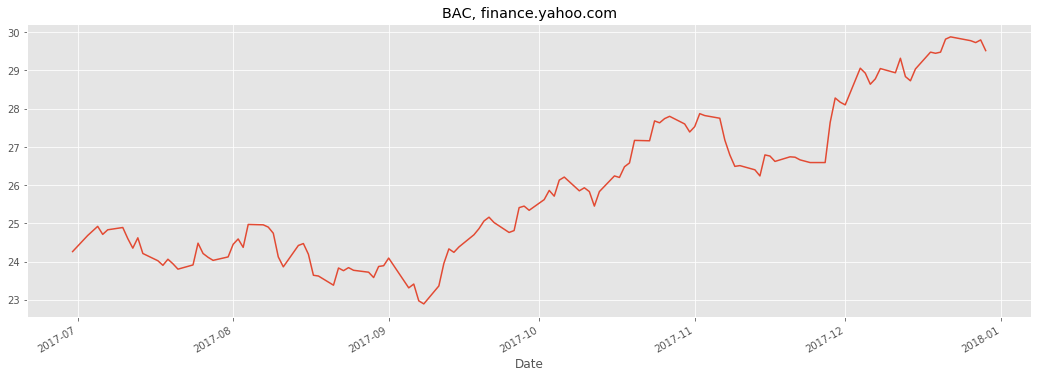

In [10]:
df1_c.Close.plot(figsize=(18, 6), title='BAC, finance.yahoo.com')

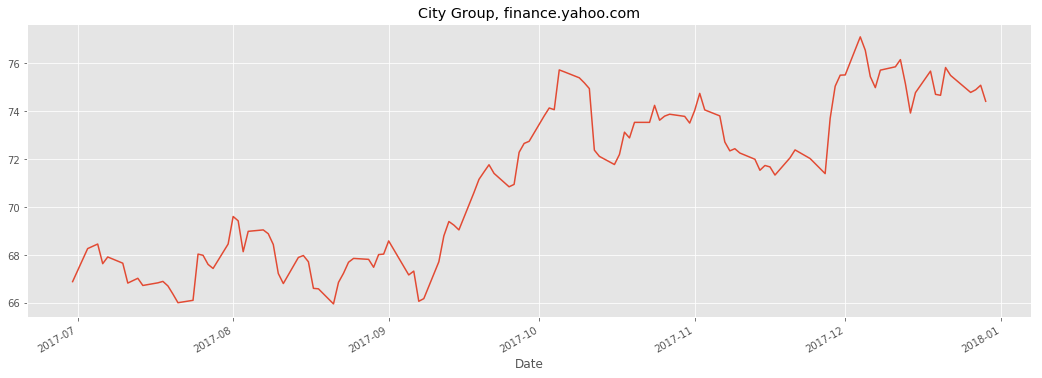

In [11]:
df2_c.Close.plot(figsize=(18, 6), title='Citigroup, finance.yahoo.com')

In [12]:
def minmax_elem(cdict):
    val = sorted(cdict.items(), key=lambda x: x[1])
    return val[0], val[-1]

MAX_NEG_SHIFT, MAX_POS_SHIFT = 6, 3 
mmin, mmax = ('', (0, 10)), ('', (0, -10))
max_lst = []

def set_minmax(cat, e1):
    global mmin, mmax
    if e1[1] < mmin[1][1]:
        mmin = (cat, e1)
    if e1[1] > mmax[1][1]:
        mmax = (cat, e1)

def best_shift(base_df):
    ''' calculate the best offset for strongest correlataion between "base" and df_news_c columns '''
    global mmin, mmax
    mmin, mmax = ('', (0, 10)), ('', (0, -10))
    for col in df_news_c.columns:
        close_corr = {i: base_df.corr(df_news_c[col].shift(i)) for i in range(-MAX_NEG_SHIFT, MAX_POS_SHIFT)}
        min_elem, max_elem = minmax_elem(close_corr)
        set_minmax(col, min_elem)
        set_minmax(col, max_elem)
        max_lst.append((col, max_elem))
        print('{0:>30}:   lower:{1[0]: 2d}({1[1]: .3f}), upper:{2[0]: 2d}({2[1]: .3f})'
              .format(col, min_elem, max_elem))
    print('- {0[0]}:{0[1][0]}({0[1][1]: .3f})'.format(mmin))
    print('- {0[0]}:{0[1][0]}({0[1][1]: .3f})'.format(mmax))
    
best_shift(df1_c.Close)


                    news_score:   lower:-5(-0.011), upper:-3( 0.083)
 business.energy-and-resources:   lower:-4(-0.130), upper:-2( 0.107)
           business.innovation:   lower: 0(-0.194), upper:-5(-0.044)
 news.law.courts.circuit-court:   lower:-3(-0.320), upper:-5(-0.150)
                 news.politics:   lower:-4(-0.038), upper:-2( 0.181)
business.agribusiness-and-food:   lower:-4(-0.104), upper:-2( 0.077)
      news.politics.oireachtas:   lower:-2(-0.132), upper:-4(-0.016)
        news.world.middle-east:   lower: 2(-0.258), upper:-3(-0.126)
         business.construction:   lower:-2( 0.052), upper:-6( 0.159)
news.law.courts.district-court:   lower:-4( 0.046), upper:-2( 0.165)
             news.world.africa:   lower:-2( 0.007), upper:-6( 0.150)
       news.world.asia-pacific:   lower:-3(-0.103), upper: 0( 0.054)
                 business.work:   lower:-1(-0.067), upper:-5( 0.028)
              business.markets:   lower:-2(-0.104), upper:-4( 0.099)
     business.personal-finance:   

In [13]:
# mmax sorted
mmax_sorted = sorted(max_lst, key=lambda x: x[1][1], reverse=True)
mmax_sorted[:]

[('news.world', (-3, 0.2934958622603949)),
 ('news.world.europe', (-4, 0.1957075796411066)),
 ('business.media-and-marketing', (-1, 0.18351695948419405)),
 ('other_cat', (-4, 0.18305152326323285)),
 ('news.politics', (-2, 0.18071137072538154)),
 ('news.law.courts.district-court', (-2, 0.16486182531649377)),
 ('business.construction', (-6, 0.15929992377990193)),
 ('news.world.africa', (-6, 0.1502504001974882)),
 ('business.commercial-property', (1, 0.14875882217337874)),
 ('business', (-2, 0.133336255941167)),
 ('news.law', (0, 0.12234343097144085)),
 ('business.energy-and-resources', (-2, 0.10735563943450059)),
 ('business.technology', (-1, 0.10693663986590576)),
 ('news.world.uk', (-1, 0.10439454082864415)),
 ('business.markets', (-4, 0.0992431374409027)),
 ('news_score', (-3, 0.08294152465912724)),
 ('business.manufacturing', (-2, 0.08056684971428205)),
 ('business.health-pharma', (0, 0.07909662624017309)),
 ('business.agribusiness-and-food', (-2, 0.07703258234432471)),
 ('news.world

In [14]:
news_w_corr = {i: df1_c.Close.corr(df_news_c['news.world'].shift(i)) for i in range(-MAX_NEG_SHIFT, MAX_POS_SHIFT)}

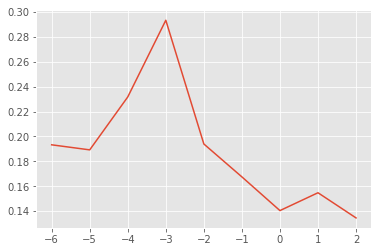

In [15]:
plt.plot(news_w_corr.keys(), news_w_corr.values())

In [19]:
MAX_NEG_SHIFT, MAX_POS_SHIFT = 6, 3 
mmin, mmax = ('', (0, 10)), ('', (0, -10))
max_lst = []

best_shift(df2_c.Close)

                    news_score:   lower: 2( 0.003), upper:-3( 0.127)
 business.energy-and-resources:   lower:-4(-0.152), upper:-2( 0.130)
           business.innovation:   lower:-6(-0.164), upper:-5(-0.024)
 news.law.courts.circuit-court:   lower:-3(-0.241), upper: 2(-0.048)
                 news.politics:   lower:-6(-0.036), upper:-2( 0.093)
business.agribusiness-and-food:   lower:-4(-0.076), upper: 2( 0.112)
      news.politics.oireachtas:   lower:-2(-0.194), upper:-4(-0.065)
        news.world.middle-east:   lower:-5(-0.220), upper:-3(-0.080)
         business.construction:   lower:-2( 0.067), upper:-6( 0.259)
news.law.courts.district-court:   lower:-4( 0.036), upper:-6( 0.148)
             news.world.africa:   lower:-3(-0.045), upper: 2( 0.145)
       news.world.asia-pacific:   lower:-3(-0.019), upper: 2( 0.145)
                 business.work:   lower: 0(-0.073), upper:-5( 0.018)
              business.markets:   lower:-2(-0.144), upper:-4( 0.130)
     business.personal-finance:   

In [20]:
mmax_sorted = sorted(max_lst, key=lambda x: x[1][1], reverse=True)
mmax_sorted[:]

[('news.world', (-3, 0.2890529891634403)),
 ('business.construction', (-6, 0.2592209667678535)),
 ('business.commercial-property', (-6, 0.19581072043441533)),
 ('news.world.europe', (-4, 0.19078427464821646)),
 ('news.law', (0, 0.16481385943954988)),
 ('business', (-3, 0.15076613978726028)),
 ('news.law.courts.district-court', (-6, 0.14848995633349235)),
 ('business.technology', (-4, 0.14583555290952174)),
 ('news.world.asia-pacific', (2, 0.14538591022108635)),
 ('news.world.africa', (2, 0.14529417510525572)),
 ('business.energy-and-resources', (-2, 0.13038412305725633)),
 ('business.markets', (-4, 0.12984848705004903)),
 ('news_score', (-3, 0.12738968557242172)),
 ('other_cat', (-4, 0.1220684073049712)),
 ('news.world.uk', (-4, 0.11737058822287427)),
 ('business.manufacturing', (-2, 0.11546351042746161)),
 ('business.economy', (1, 0.11337159910828615)),
 ('business.agribusiness-and-food', (2, 0.11198630873086023)),
 ('business.media-and-marketing', (0, 0.10524820461347255)),
 ('news.p

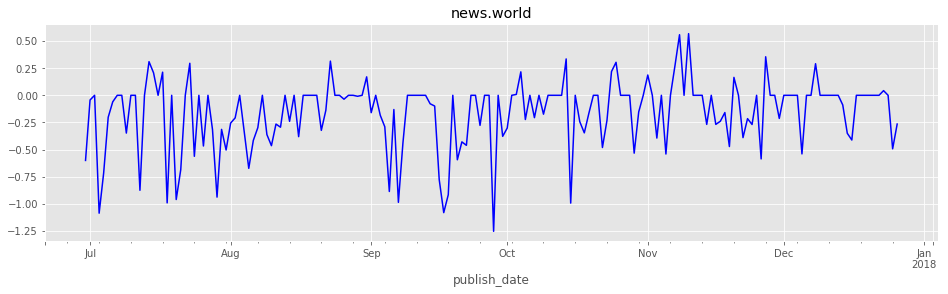

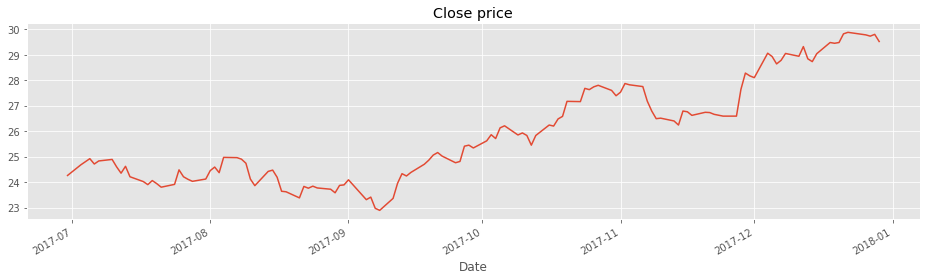

In [17]:
# ax = df_news_score['news.world'].plot(figsize=(16, 4))
df_news_c['news.world'].shift(-3).plot(figsize=(16, 4), color='b', title='news.world')
plt.figure(figsize=(16, 4))
df1_c.Close.plot(title='Close price')